In [1]:
from roucy_dumpfileparser import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import log_parser
import seaborn as sns
from matplotlib import animation
import time
import itertools
from pandas.plotting import register_matplotlib_converters
%matplotlib inline

In [2]:
pwd

'/Users/muztobarabbani/Downloads/research/2023/march/analysis_700'

In [3]:
name='seed1'
upper_half='upper_half_seed1.lammpstrj'
logfile='log_seed1_700.Pt_shape'
# file_disquare='di_square_seed2_700'
# dislocation='dislocation_count_highkey1'
# pt = 0 # starting file pointer, leave as 0
# timestep = getfirsttimestep(file_disquare) # initial timestep
# timestep

In [4]:

# timestep = getfirsttimestep(file_disquare) # initial timestep
# dumpfreq = 2500   # corresponds to the dump frequency value used in the simulation
# runtime  = 10000000 # corresponds to the run time used to make the dumpfile
# time2=[]
# di_sqr=[]

# start_time = time.time()


# while timestep <= runtime:
#     data, pt = parsedumpfile(file_disquare, pt)
#     time2.append(timestep)
#     di_sqr.append(np.average(data['NonaffineSquaredDisplacement']))
    
#     end_time = time.time()
#     elapsed_time = end_time - start_time
#     print(timestep)
# #     print('Elapsed time at iteration', i, ': ', elapsed_time)
    
#     timestep += dumpfreq # update timestep 
    
# print(data.keys())
# print(time2)
# print(di_sqr)

In [5]:
timestep=0
pt=0
dumpfreq = 2500   # corresponds to the dump frequency value used in the simulation
runtime  = 10000000 # corresponds to the run time used to make the dumpfile
account=[]
ave_top_300=[]
while timestep <= runtime:

    data, pt = parsedumpfile(upper_half, pt)
    z_axis=data['z']
    z_axis.sort()
    heighest=z_axis[-20:]
    mean=sum(heighest)/len(heighest)
    ave_top_300.append(mean)
    print(timestep/2500, 'timestep')
    timestep += dumpfreq # update timestep 

0.0 timestep
1.0 timestep
2.0 timestep
3.0 timestep
4.0 timestep
5.0 timestep
6.0 timestep
7.0 timestep
8.0 timestep
9.0 timestep
10.0 timestep
11.0 timestep
12.0 timestep
13.0 timestep
14.0 timestep
15.0 timestep
16.0 timestep
17.0 timestep
18.0 timestep
19.0 timestep
20.0 timestep
21.0 timestep
22.0 timestep
23.0 timestep
24.0 timestep
25.0 timestep
26.0 timestep
27.0 timestep
28.0 timestep
29.0 timestep
30.0 timestep
31.0 timestep
32.0 timestep
33.0 timestep
34.0 timestep
35.0 timestep
36.0 timestep
37.0 timestep
38.0 timestep
39.0 timestep
40.0 timestep
41.0 timestep
42.0 timestep
43.0 timestep
44.0 timestep
45.0 timestep
46.0 timestep
47.0 timestep
48.0 timestep
49.0 timestep
50.0 timestep
51.0 timestep
52.0 timestep
53.0 timestep
54.0 timestep
55.0 timestep
56.0 timestep
57.0 timestep
58.0 timestep
59.0 timestep
60.0 timestep
61.0 timestep
62.0 timestep
63.0 timestep
64.0 timestep
65.0 timestep
66.0 timestep
67.0 timestep
68.0 timestep
69.0 timestep
70.0 timestep
71.0 timestep
72

626.0 timestep
627.0 timestep
628.0 timestep
629.0 timestep
630.0 timestep
631.0 timestep
632.0 timestep
633.0 timestep
634.0 timestep
635.0 timestep
636.0 timestep
637.0 timestep
638.0 timestep
639.0 timestep
640.0 timestep
641.0 timestep
642.0 timestep
643.0 timestep
644.0 timestep
645.0 timestep
646.0 timestep
647.0 timestep
648.0 timestep
649.0 timestep
650.0 timestep
651.0 timestep
652.0 timestep
653.0 timestep
654.0 timestep
655.0 timestep
656.0 timestep
657.0 timestep
658.0 timestep
659.0 timestep
660.0 timestep
661.0 timestep
662.0 timestep
663.0 timestep
664.0 timestep
665.0 timestep
666.0 timestep
667.0 timestep
668.0 timestep
669.0 timestep
670.0 timestep
671.0 timestep
672.0 timestep
673.0 timestep
674.0 timestep
675.0 timestep
676.0 timestep
677.0 timestep
678.0 timestep
679.0 timestep
680.0 timestep
681.0 timestep
682.0 timestep
683.0 timestep
684.0 timestep
685.0 timestep
686.0 timestep
687.0 timestep
688.0 timestep
689.0 timestep
690.0 timestep
691.0 timestep
692.0 time

1204.0 timestep
1205.0 timestep
1206.0 timestep
1207.0 timestep
1208.0 timestep
1209.0 timestep
1210.0 timestep
1211.0 timestep
1212.0 timestep
1213.0 timestep
1214.0 timestep
1215.0 timestep
1216.0 timestep
1217.0 timestep
1218.0 timestep
1219.0 timestep
1220.0 timestep
1221.0 timestep
1222.0 timestep
1223.0 timestep
1224.0 timestep
1225.0 timestep
1226.0 timestep
1227.0 timestep
1228.0 timestep
1229.0 timestep
1230.0 timestep
1231.0 timestep
1232.0 timestep
1233.0 timestep
1234.0 timestep
1235.0 timestep
1236.0 timestep
1237.0 timestep
1238.0 timestep
1239.0 timestep
1240.0 timestep
1241.0 timestep
1242.0 timestep
1243.0 timestep
1244.0 timestep
1245.0 timestep
1246.0 timestep
1247.0 timestep
1248.0 timestep
1249.0 timestep
1250.0 timestep
1251.0 timestep
1252.0 timestep
1253.0 timestep
1254.0 timestep
1255.0 timestep
1256.0 timestep
1257.0 timestep
1258.0 timestep
1259.0 timestep
1260.0 timestep
1261.0 timestep
1262.0 timestep
1263.0 timestep
1264.0 timestep
1265.0 timestep
1266.0 t

1731.0 timestep
1732.0 timestep
1733.0 timestep
1734.0 timestep
1735.0 timestep
1736.0 timestep
1737.0 timestep
1738.0 timestep
1739.0 timestep
1740.0 timestep
1741.0 timestep
1742.0 timestep
1743.0 timestep
1744.0 timestep
1745.0 timestep
1746.0 timestep
1747.0 timestep
1748.0 timestep
1749.0 timestep
1750.0 timestep
1751.0 timestep
1752.0 timestep
1753.0 timestep
1754.0 timestep
1755.0 timestep
1756.0 timestep
1757.0 timestep
1758.0 timestep
1759.0 timestep
1760.0 timestep
1761.0 timestep
1762.0 timestep
1763.0 timestep
1764.0 timestep
1765.0 timestep
1766.0 timestep
1767.0 timestep
1768.0 timestep
1769.0 timestep
1770.0 timestep
1771.0 timestep
1772.0 timestep
1773.0 timestep
1774.0 timestep
1775.0 timestep
1776.0 timestep
1777.0 timestep
1778.0 timestep
1779.0 timestep
1780.0 timestep
1781.0 timestep
1782.0 timestep
1783.0 timestep
1784.0 timestep
1785.0 timestep
1786.0 timestep
1787.0 timestep
1788.0 timestep
1789.0 timestep
1790.0 timestep
1791.0 timestep
1792.0 timestep
1793.0 t

2258.0 timestep
2259.0 timestep
2260.0 timestep
2261.0 timestep
2262.0 timestep
2263.0 timestep
2264.0 timestep
2265.0 timestep
2266.0 timestep
2267.0 timestep
2268.0 timestep
2269.0 timestep
2270.0 timestep
2271.0 timestep
2272.0 timestep
2273.0 timestep
2274.0 timestep
2275.0 timestep
2276.0 timestep
2277.0 timestep
2278.0 timestep
2279.0 timestep
2280.0 timestep
2281.0 timestep
2282.0 timestep
2283.0 timestep
2284.0 timestep
2285.0 timestep
2286.0 timestep
2287.0 timestep
2288.0 timestep
2289.0 timestep
2290.0 timestep
2291.0 timestep
2292.0 timestep
2293.0 timestep
2294.0 timestep
2295.0 timestep
2296.0 timestep
2297.0 timestep
2298.0 timestep
2299.0 timestep
2300.0 timestep
2301.0 timestep
2302.0 timestep
2303.0 timestep
2304.0 timestep
2305.0 timestep
2306.0 timestep
2307.0 timestep
2308.0 timestep
2309.0 timestep
2310.0 timestep
2311.0 timestep
2312.0 timestep
2313.0 timestep
2314.0 timestep
2315.0 timestep
2316.0 timestep
2317.0 timestep
2318.0 timestep
2319.0 timestep
2320.0 t

2790.0 timestep
2791.0 timestep
2792.0 timestep
2793.0 timestep
2794.0 timestep
2795.0 timestep
2796.0 timestep
2797.0 timestep
2798.0 timestep
2799.0 timestep
2800.0 timestep
2801.0 timestep
2802.0 timestep
2803.0 timestep
2804.0 timestep
2805.0 timestep
2806.0 timestep
2807.0 timestep
2808.0 timestep
2809.0 timestep
2810.0 timestep
2811.0 timestep
2812.0 timestep
2813.0 timestep
2814.0 timestep
2815.0 timestep
2816.0 timestep
2817.0 timestep
2818.0 timestep
2819.0 timestep
2820.0 timestep
2821.0 timestep
2822.0 timestep
2823.0 timestep
2824.0 timestep
2825.0 timestep
2826.0 timestep
2827.0 timestep
2828.0 timestep
2829.0 timestep
2830.0 timestep
2831.0 timestep
2832.0 timestep
2833.0 timestep
2834.0 timestep
2835.0 timestep
2836.0 timestep
2837.0 timestep
2838.0 timestep
2839.0 timestep
2840.0 timestep
2841.0 timestep
2842.0 timestep
2843.0 timestep
2844.0 timestep
2845.0 timestep
2846.0 timestep
2847.0 timestep
2848.0 timestep
2849.0 timestep
2850.0 timestep
2851.0 timestep
2852.0 t

3319.0 timestep
3320.0 timestep
3321.0 timestep
3322.0 timestep
3323.0 timestep
3324.0 timestep
3325.0 timestep
3326.0 timestep
3327.0 timestep
3328.0 timestep
3329.0 timestep
3330.0 timestep
3331.0 timestep
3332.0 timestep
3333.0 timestep
3334.0 timestep
3335.0 timestep
3336.0 timestep
3337.0 timestep
3338.0 timestep
3339.0 timestep
3340.0 timestep
3341.0 timestep
3342.0 timestep
3343.0 timestep
3344.0 timestep
3345.0 timestep
3346.0 timestep
3347.0 timestep
3348.0 timestep
3349.0 timestep
3350.0 timestep
3351.0 timestep
3352.0 timestep
3353.0 timestep
3354.0 timestep
3355.0 timestep
3356.0 timestep
3357.0 timestep
3358.0 timestep
3359.0 timestep
3360.0 timestep
3361.0 timestep
3362.0 timestep
3363.0 timestep
3364.0 timestep
3365.0 timestep
3366.0 timestep
3367.0 timestep
3368.0 timestep
3369.0 timestep
3370.0 timestep
3371.0 timestep
3372.0 timestep
3373.0 timestep
3374.0 timestep
3375.0 timestep
3376.0 timestep
3377.0 timestep
3378.0 timestep
3379.0 timestep
3380.0 timestep
3381.0 t

3835.0 timestep
3836.0 timestep
3837.0 timestep
3838.0 timestep
3839.0 timestep
3840.0 timestep
3841.0 timestep
3842.0 timestep
3843.0 timestep
3844.0 timestep
3845.0 timestep
3846.0 timestep
3847.0 timestep
3848.0 timestep
3849.0 timestep
3850.0 timestep
3851.0 timestep
3852.0 timestep
3853.0 timestep
3854.0 timestep
3855.0 timestep
3856.0 timestep
3857.0 timestep
3858.0 timestep
3859.0 timestep
3860.0 timestep
3861.0 timestep
3862.0 timestep
3863.0 timestep
3864.0 timestep
3865.0 timestep
3866.0 timestep
3867.0 timestep
3868.0 timestep
3869.0 timestep
3870.0 timestep
3871.0 timestep
3872.0 timestep
3873.0 timestep
3874.0 timestep
3875.0 timestep
3876.0 timestep
3877.0 timestep
3878.0 timestep
3879.0 timestep
3880.0 timestep
3881.0 timestep
3882.0 timestep
3883.0 timestep
3884.0 timestep
3885.0 timestep
3886.0 timestep
3887.0 timestep
3888.0 timestep
3889.0 timestep
3890.0 timestep
3891.0 timestep
3892.0 timestep
3893.0 timestep
3894.0 timestep
3895.0 timestep
3896.0 timestep
3897.0 t

In [6]:
thermo_coated_300K=log_parser.thermo_dict(logfile,1)
minimum_300K=thermo_coated_300K['c_2[3]']
lowest_300K=float(min(minimum_300K))
print(lowest_300K, 'lowest position')
initial_300=float(ave_top_300[0])
print(initial_300, 'average position of top layer')
original_length=initial_300-lowest_300K
print(original_length,'originial length')

displacement_300k=[]
for x in ave_top_300:
    new_length=float(x)-lowest_300K
    disp=(original_length-new_length)/original_length

    displacement_300k.append(disp)


-17.696825 lowest position
17.557565 average position of top layer
35.25439 originial length


In [7]:
force_coated_300K=thermo_coated_300K['f_printforce']
converted_force_coated_300K=[x*1.602 for x in force_coated_300K]

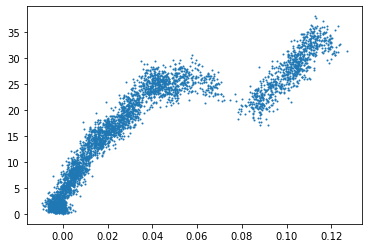

In [8]:
plt.scatter(displacement_300k,converted_force_coated_300K,label='coated 300 K',s=1)
# len(converted_force_coated_300K)

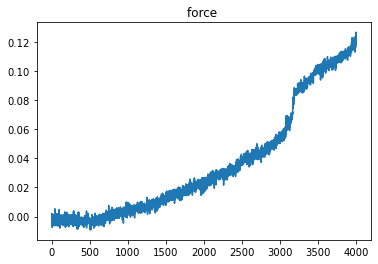

In [9]:
# plt.tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
plt.title("force ")
# plt.plot(converted_force_coated_300K)
# plt.savefig("new_lower_repulisve_wall_force.jpg",dpi=300, bbox_inches='tight')

# plt.title("displacement  ")
plt.plot(displacement_300k)
# plt.savefig("new_lower_repulisve_wall_displacement.jpg",dpi=300, bbox_inches='tight')

In [10]:
# x_uncoated=displacement_300k
# y_uncoated=converted_force_coated_300K


In [11]:
x_coated=displacement_300k
y_coated=converted_force_coated_300K

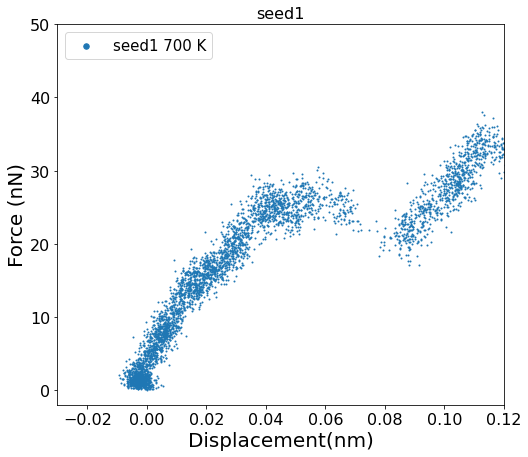

In [12]:
plt.figure(figsize=(8,7))

plt.scatter(displacement_300k,converted_force_coated_300K,label='{} 700 K'.format(name),s=1)




plt.title("{}".format(name),fontsize=16)
plt.xlabel('Displacement(nm)',fontsize=20)
plt.ylabel("Force (nN)",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([-2,50])
plt.xlim(-.03,.12)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=15)
lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]


# plt.savefig("force_vs_displacement_{}.jpg".format(name),dpi=300, bbox_inches='tight')

In [26]:
name2='uncoated'
name='coated'

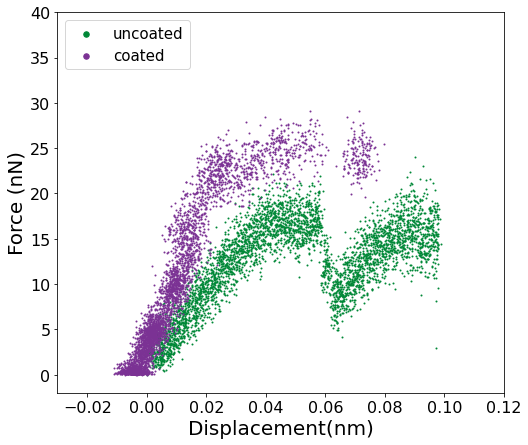

In [30]:
plt.figure(figsize=(8,7))

plt.scatter(x_uncoated,y_uncoated,label='{}'.format(name2),s=1,color='#008837')
plt.scatter(x_coated,y_coated,label='{}'.format(name),s=1,color='#7b3294')





# plt.title("{}".format(name),fontsize=16)
plt.xlabel('Displacement(nm)',fontsize=20)
plt.ylabel("Force (nN)",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([-2,40])
plt.xlim(-.03,.12)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=15)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]


plt.savefig("coated_vs_uncoated",dpi=300, bbox_inches='tight')

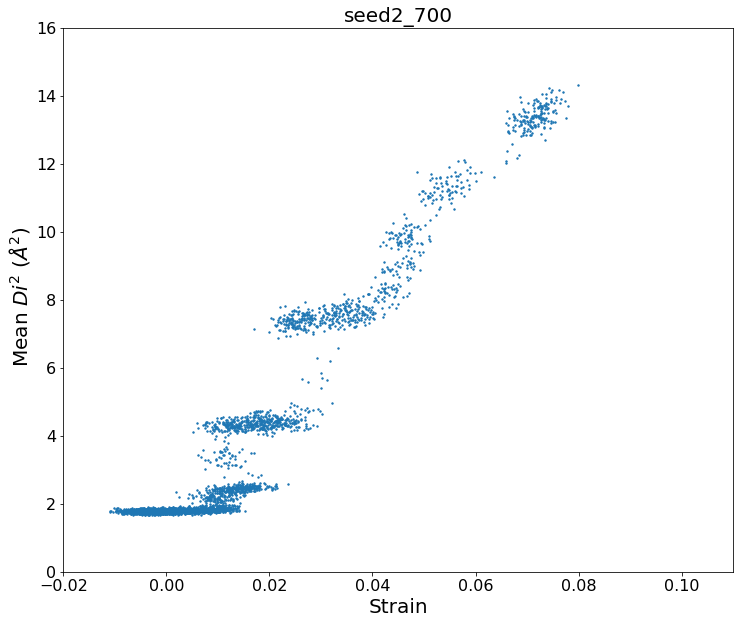

In [13]:
plt.figure(figsize=(12, 10))

plt.scatter(displacement_300k[2:],di_sqr[2:],s=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Strain',fontsize=20)
plt.ylabel(' Mean $ Di^{2}$ $(Å^{2}) $',fontsize=20)
plt.title('{}'.format(name),fontsize=20)
plt.xlim(-.02,0.11)
plt.ylim(0,16)
plt.savefig('Di_squared_{}.jpg'.format(name),dpi=300, bbox_inches='tight')


In [14]:
pwd

'/Users/muztobarabbani/Downloads/research/2023/march/analysis_700'

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation

def update_points(num):
    '''
    更新数据点
    '''
    point_ani.set_data(x[num], y[num])
    return point_ani,

In [16]:
# plt.scatter(displacement_300k,converted_force_coated_300K,label='coated 300 K',s=1)
animated_strain=displacement_300k
animated_y=converted_force_coated_300K

x=animated_strain
y=animated_y

MovieWriter imagemagick unavailable; using Pillow instead.


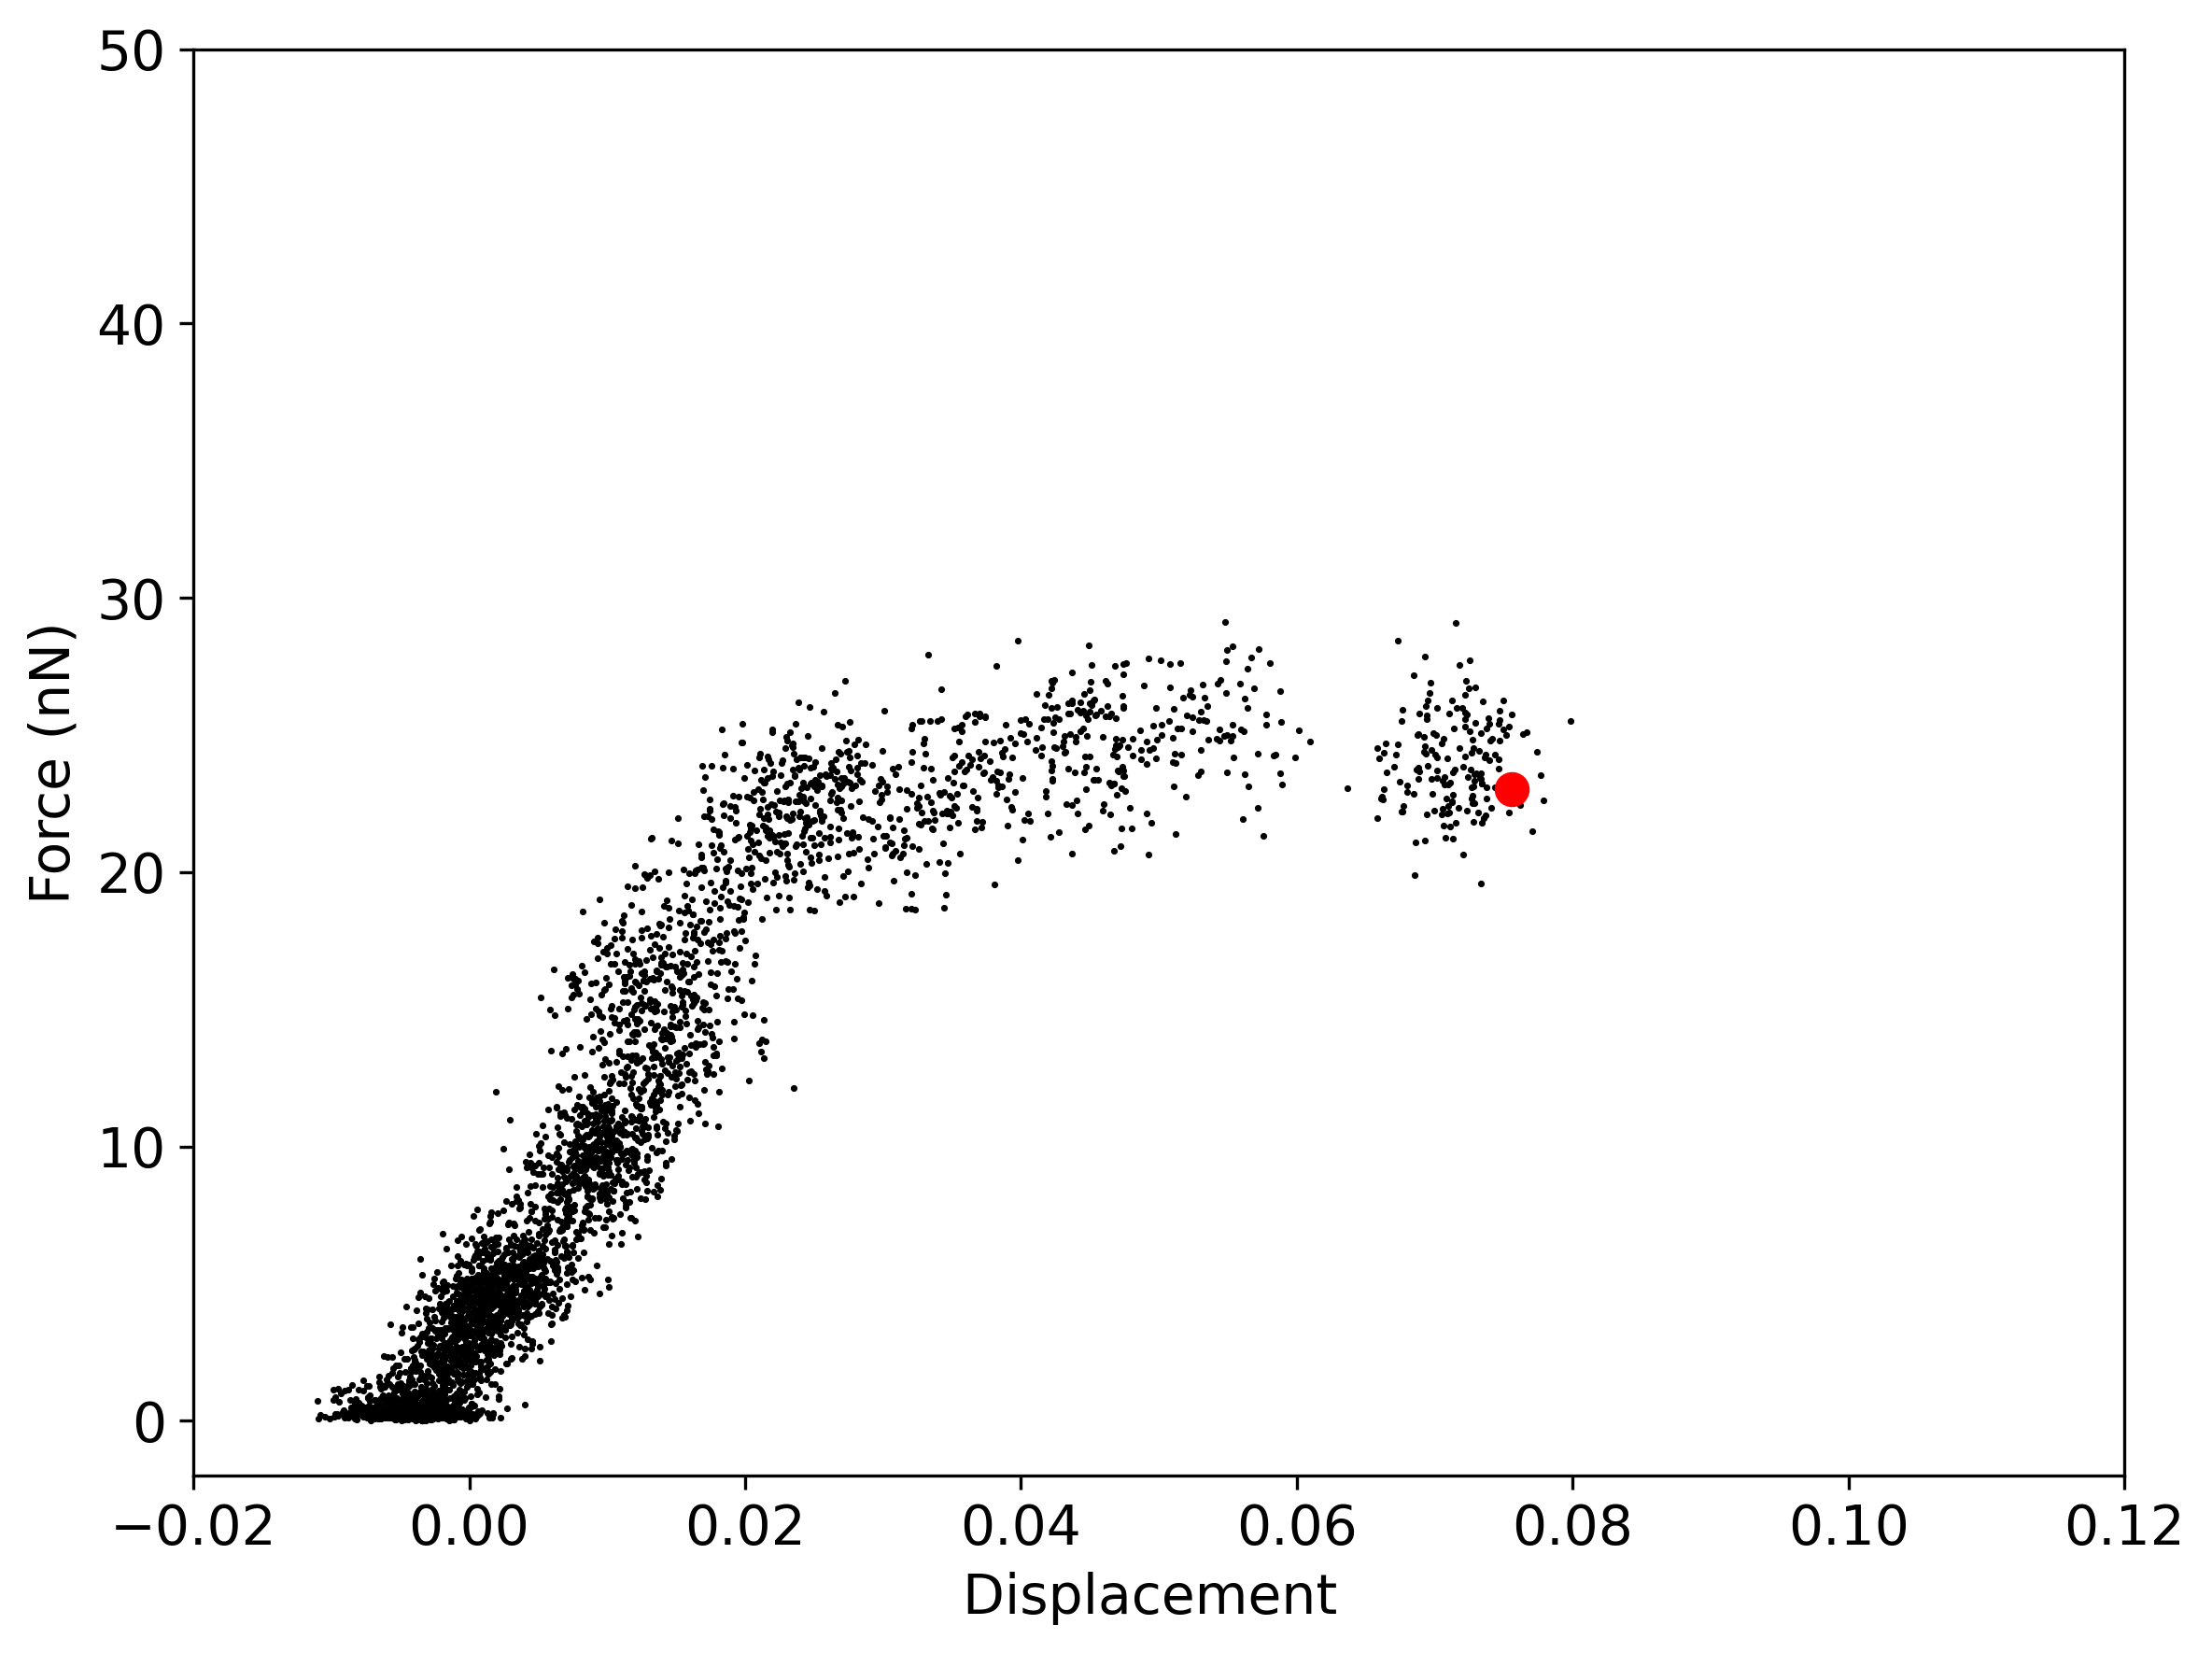

In [18]:
fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True,dpi=300)
#fig,ax = plt.figure(tight_layout=True,dpi=200)
plt.scatter(x,y,lw=.3,color='k',s=2)
point_ani, = plt.plot(x[0], y[0], "ro",markersize=8)
# plt.grid(ls="--")
ax.set_ylabel("Force (nN)",size=14)
ax.set_xlabel("Displacement ",size=14)
ax.set_ylim([-2,50])
ax.set_xlim([-.02,0.12])
#ylabel = ax.get_yticklabels(which='major')
# ax.set_yticklabels(ax.yaxis.get_majorticklabels(),fontsize=12)
plt.setp(ax.yaxis.get_majorticklabels(),size = 14)
plt.setp(ax.xaxis.get_majorticklabels(),size = 14)
ani = animation.FuncAnimation(fig, update_points, np.arange(1, len(x), 18), interval=1, blit=True)
ani.save('{}.gif'.format(name), writer='imagemagick', fps=4)

In [16]:
df=pd.read_csv(dislocation,header=None,names=['dislocation-count'])
dislocation_count=df['dislocation-count'].to_list()

cumulative_sum = list(itertools.accumulate(dislocation_count))
print(len(cumulative_sum))

4000


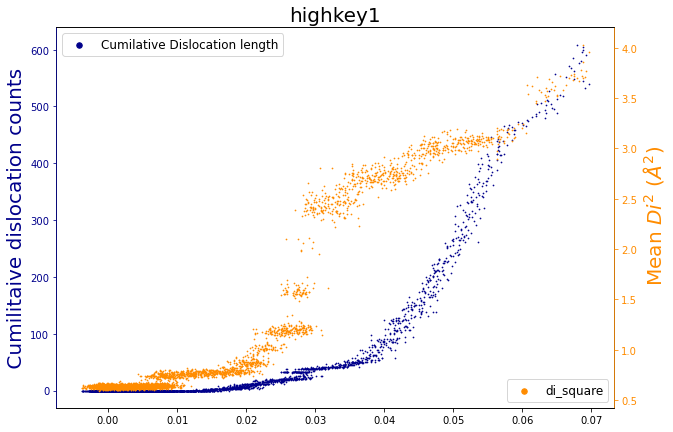

In [17]:

x=displacement_300k[2:4000]
y1=cumulative_sum[2:4000]
y2=di_sqr[2:4000]
fig,ax1=plt.subplots(figsize=(10,7))
ax2=ax1.twinx()


curve1=ax1.scatter(x,y1,label='Cumilative Dislocation length',color='darkblue',s=.5)
curve2=ax2.scatter(x,y2,label='di_square',color='darkorange',s=.5)
ax1.set_ylabel(' Cumilitaive dislocation counts ' ,fontsize=20,color='darkblue')
ax2.set_ylabel(' Mean $ Di^{2}$ $(Å^{2}) $',fontsize=20,color='darkorange')

ax1.tick_params(axis='y', colors='darkblue')
ax2.tick_params(axis='y', colors='darkorange')

ax2.spines['left'].set_color('darkblue') 
ax2.spines['right'].set_color('darkorange') 

ax1.legend(loc='upper left',fontsize=12)
ax2.legend(loc='lower right',fontsize=12)
plt.title(name,fontsize=20)



# Plot legend.
lgnd1 = ax1.legend(loc="upper left", scatterpoints=1, fontsize=12)
lgnd1.legendHandles[0]._sizes = [30]

lgnd2 = ax2.legend(loc="lower right", scatterpoints=1, fontsize=12)
lgnd2.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]

plt.savefig('cumulative_dislocation_vs_di_square_{}.jpg'.format(name),dpi=300, bbox_inches='tight')
